In [31]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, kendalltau


In [33]:
data_dir = 'results/ARI_alpha_reduced_No/NET_ICU_ARI_variables.txt'
patient_information = 'data/part_info.txt'


In [34]:
# load patient info
info = pd.read_csv(patient_information, sep = '\t')
info.head()

,ID,Better_Hem,Reason,Age,Sex,States,GCS_sedon1,GCS_sedoff,GCS_sedon2,Dose,Prediction_6m,Prediction_12m,Outcome,Goup_outcome,3m_GOSE,3m_DRS,6m_GOSE,6m_DRS
0,002MG,left,el,43,M,3,4T,4T,4T,30mcg/kg/min,-,-,WOC,0,1,-,1,-
1,003MG,right,el,41,M,3,7T,10T,10T,50mcg ?,-,-,Favorable,2,3,13,1,-
2,003MW,left,hub,60,F,2,6,6,-,2mg/kg/hr,-,-,Unfavorable,1,1,-,1,-
3,004MG,left,el,67,F,3,7,7,7,30mcg/kg/min,-,-,Unfavorable,1,1,-,1,-
4,004MW,right,?,58,F,2,3T,3T,-,2mg/kg/hr,-,-,Favorable,2,-,-,-,-


In [35]:
# load data
features = pd.read_csv(data_dir, sep = ',')
features['ARI'] = features['hub_ARI'] + features['dpli_ARI']
features

,P_ID,dpli_on1,dpli_off,dpli_on2,dpli_diff_on1_off,dpli_diff_off_on2,dpli_diff_on1_on2,dpli_ARI,hub_on1,hub_off,hub_on2,hub_diff_on1_off,hub_diff_off_on2,hub_diff_on1_on2,hub_ARI,ARI
0,002MG,0.503379,0.512042,0.507155,0.033603,0.025841,0.016673,0.042771,5.625130e-17,-5.921189e-17,2.072416e-17,43.878930,34.143921,26.603923,0.685586,0.728357
1,003MG,0.500541,0.502638,0.504713,0.012137,0.013931,0.015543,0.010525,-1.064597e-17,-2.129195e-17,1.216683e-17,66.320052,68.720696,41.889527,1.276044,1.286569
2,003MW,0.523116,0.514719,NaN,0.157088,NaN,NaN,NaN,-4.827057e-18,3.861645e-17,NaN,65.291762,0.000000,0.000000,NaN,NaN
3,004MG,0.502420,0.503890,0.503304,0.030241,0.009817,0.034429,0.005628,-1.800362e-17,1.560313e-16,-1.200241e-17,67.779690,62.192541,88.677418,0.558038,0.563666
4,004MW,0.500386,0.497527,NaN,0.018858,NaN,NaN,NaN,2.081668e-17,-9.251859e-18,NaN,127.943067,0.000000,0.000000,NaN,NaN
5,007MG,0.505889,0.504983,NaN,0.017586,NaN,NaN,NaN,3.779483e-17,1.417306e-17,NaN,92.648032,0.000000,0.000000,NaN,NaN
6,005MW,0.497855,0.507766,NaN,0.029853,NaN,NaN,NaN,9.251859e-18,-9.251859e-18,NaN,104.261138,0.000000,0.000000,NaN,NaN
7,009MG,0.491125,0.498926,NaN,0.015058,NaN,NaN,NaN,5.046468e-17,2.270911e-17,NaN,75.793618,0.000000,0.000000,NaN,NaN
8,006MW,0.493093,0.495768,NaN,0.012428,NaN,NaN,NaN,-2.691450e-17,4.485750e-18,NaN,91.626933,0.000000,0.000000,NaN,NaN
9,010MG,0.511432,0.514878,0.514614,0.038598,0.015782,0.045114,0.009267,-4.037175e-17,-2.355019e-17,3.364312e-17,104.513890,49.020198,94.708099,0.594202,0.603468


In [36]:
data = pd.concat([info, features], axis = 1)
data_favorable = data[data['Outcome']=='Favorable']
data_favorable_3m = data_favorable[data_favorable['3m_GOSE']!='-']
data_favorable_6m = data_favorable[data_favorable['6m_GOSE']!='-']

data_2 = data[data['States']==2]
data_3 = data[data['States']==3]
data_3_favorable = data_3[data_3['Outcome']=='Favorable']

data_3_favorable_3m = data_3_favorable[data_3_favorable['3m_DRS']!='-']
data_3_favorable_6m = data_3_favorable[data_3_favorable['6m_DRS']!='-']

data_GOSE6m = data[data['6m_GOSE']!='-']
data_3_GOSE6m = data_GOSE6m[data_GOSE6m['States']==3]

In [37]:
data_3_favorable_6m.iloc[:,0:20]

,ID,Better_Hem,Reason,Age,Sex,States,GCS_sedon1,GCS_sedoff,GCS_sedon2,Dose,Prediction_6m,Prediction_12m,Outcome,Goup_outcome,3m_GOSE,3m_DRS,6m_GOSE,6m_DRS,P_ID,dpli_on1
9,010MG,left,injury,42,M,3,8T,10T,9T,?,7,7,Favorable,2,7,4,7,2,010MG,0.511432
10,011MG,right,?,51,F,3,6T,8T,-,50 mcg/kg/min,4,4,Favorable,2,-,-,3,8,011MG,0.497538
13,014MG,left,injury,82,M,3,7T,8T,-,25mcg/kg/min,5,6,Favorable,2,-,-,3,7,014MG,0.505086
15,017MG,right,?,27,M,3,5T,5T,-,50 mcg/kg/min,7,8,Favorable,2,6,1,7,1,017MG,0.505316
16,018MG,right,el,23,M,3,7T,9T,-,30 mcg/kg/min,-,-,Favorable,2,-,-,7,9,018MG,0.495238
18,020MG,left,?,21,M,3,7T,6T,7T,40 mcg/kg/min,7,8,Favorable,2,8,0,7,1,020MG,0.499482


In [38]:
data_GOSE6m['6m_GOSE'] = data_GOSE6m['6m_GOSE'].astype(int)
data_3_GOSE6m['6m_GOSE'] = data_3_GOSE6m['6m_GOSE'].astype(int)
data_favorable_3m['3m_GOSE'] = data_favorable_3m['3m_GOSE'].astype(int)
data_favorable_6m['6m_GOSE'] = data_favorable_6m['6m_GOSE'].astype(int)
data_favorable_3m['3m_DRS'] = data_favorable_3m['3m_DRS'].astype(int)

data_3_favorable_6m['6m_DRS'] = data_3_favorable_6m['6m_DRS'].astype(int)
data_3_favorable_6m['6m_GOSE'] = data_3_favorable_6m['6m_GOSE'].astype(int)
data_3_favorable_3m['3m_DRS'] = data_3_favorable_3m['3m_DRS'].astype(int)
data_3_favorable_3m['3m_GOSE'] = data_3_favorable_3m['3m_GOSE'].astype(int)


/var/folders/jt/1njpx4d93pn5y3nd0p7l5hwr0000gn/T/ipykernel_30214/2056673115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_GOSE6m['6m_GOSE'] = data_GOSE6m['6m_GOSE'].astype(int)
/var/folders/jt/1njpx4d93pn5y3nd0p7l5hwr0000gn/T/ipykernel_30214/2056673115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3_GOSE6m['6m_GOSE'] = data_3_GOSE6m['6m_GOSE'].astype(int)
/var/folders/jt/1njpx4d93pn5y3nd0p7l5hwr0000gn/T/ipykernel_30214/2056673115.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [39]:
data_favorable

,ID,Better_Hem,Reason,Age,Sex,States,GCS_sedon1,GCS_sedoff,GCS_sedon2,Dose,...,dpli_diff_on1_on2,dpli_ARI,hub_on1,hub_off,hub_on2,hub_diff_on1_off,hub_diff_off_on2,hub_diff_on1_on2,hub_ARI,ARI
1,003MG,right,el,41,M,3,7T,10T,10T,50mcg ?,...,0.015543,0.010525,-1.064597e-17,-2.129195e-17,1.216683e-17,66.320052,68.720696,41.889527,1.276044,1.286569
4,004MW,right,?,58,F,2,3T,3T,-,2mg/kg/hr,...,NaN,NaN,2.081668e-17,-9.251859e-18,NaN,127.943067,0.000000,0.000000,NaN,NaN
5,007MG,left,injury,67,F,2,7T,10T,-,30mcg/kg/min,...,NaN,NaN,3.779483e-17,1.417306e-17,NaN,92.648032,0.000000,0.000000,NaN,NaN
6,005MW,left,?,55,M,2,3T,3T,-,5mg/kg/hr,...,NaN,NaN,9.251859e-18,-9.251859e-18,NaN,104.261138,0.000000,0.000000,NaN,NaN
7,009MG,left,?,75,F,2,3T,1T,-,-,...,NaN,NaN,5.046468e-17,2.270911e-17,NaN,75.793618,0.000000,0.000000,NaN,NaN
9,010MG,left,injury,42,M,3,8T,10T,9T,?,...,0.045114,0.009267,-4.037175e-17,-2.355019e-17,3.364312e-17,104.513890,49.020198,94.708099,0.594202,0.603468
10,011MG,right,?,51,F,3,6T,8T,-,50 mcg/kg/min,...,0.017176,0.017434,5.104474e-18,6.380592e-18,1.531342e-17,83.192487,91.726343,76.475949,1.131527,1.148961
13,014MG,left,injury,82,M,3,7T,8T,-,25mcg/kg/min,...,0.014170,0.018824,1.168656e-17,-2.454177e-17,-9.349247e-18,73.210061,79.666168,57.363875,1.005393,1.024217
15,017MG,right,?,27,M,3,5T,5T,-,50 mcg/kg/min,...,0.021515,0.013909,-5.124106e-17,0.000000e+00,-1.708035e-17,43.591789,13.014456,46.988544,0.184956,0.198865
16,018MG,right,el,23,M,3,7T,9T,-,30 mcg/kg/min,...,0.053516,0.045299,-7.401487e-18,-1.665335e-17,1.480297e-17,49.500137,38.100682,45.147717,0.707552,0.752850


In [40]:
colors = ["skyblue", "lightseagreen","lightcoral"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors))


Text(1230.8839869281046, 0.5, 'DPLI Sedation ON2 ')

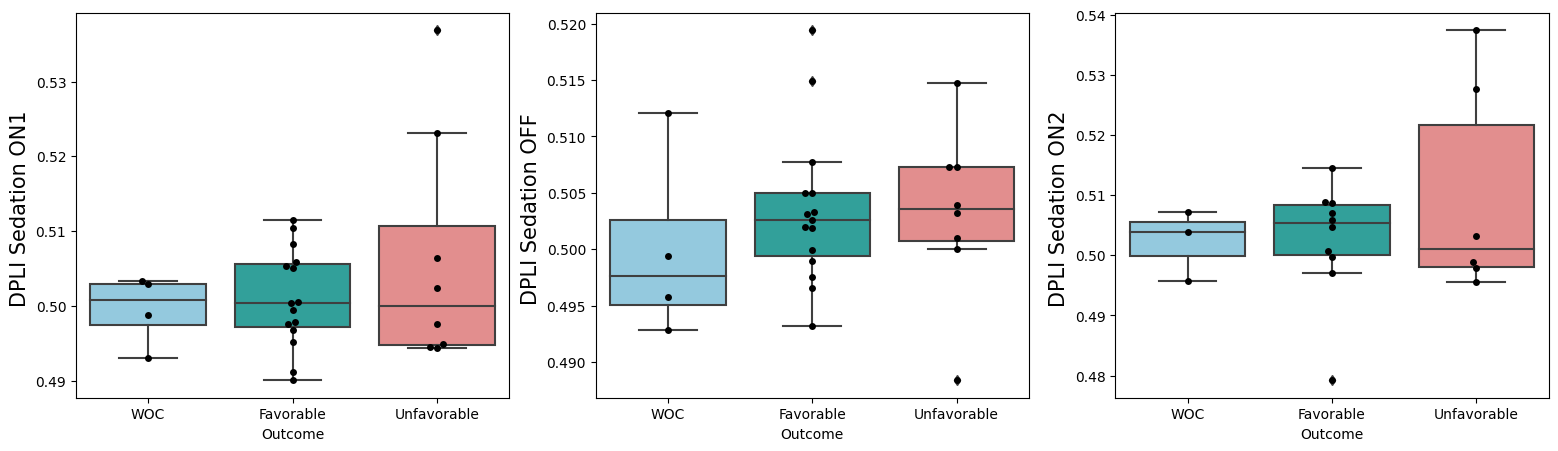

In [41]:
plt.figure(figsize = (19,5))

ax = plt.subplot(131)
# PLOT HEALTHY
ax = sns.boxplot(y = 'dpli_on1', x = 'Outcome', data = data)
ax = sns.swarmplot(y = 'dpli_on1', x = 'Outcome', data = data, color="black", size = 5)
ax.set_ylabel("DPLI Sedation ON1 ",fontsize=15)

ax = plt.subplot(132)
# PLOT HEALTHY
ax = sns.boxplot(y = 'dpli_off', x = 'Outcome', data = data)
ax = sns.swarmplot(y = 'dpli_off', x = 'Outcome', data = data, color="black", size = 5)
ax.set_ylabel("DPLI Sedation OFF ",fontsize=15)

ax = plt.subplot(133)
# PLOT HEALTHY
ax = sns.boxplot(y = 'dpli_on2', x = 'Outcome', data = data)
ax = sns.swarmplot(y = 'dpli_on2', x = 'Outcome', data = data, color="black", size = 5)
ax.set_ylabel("DPLI Sedation ON2 ",fontsize=15)

Text(1230.8839869281046, 0.5, 'Δ DPLI OFF-ON2 ')

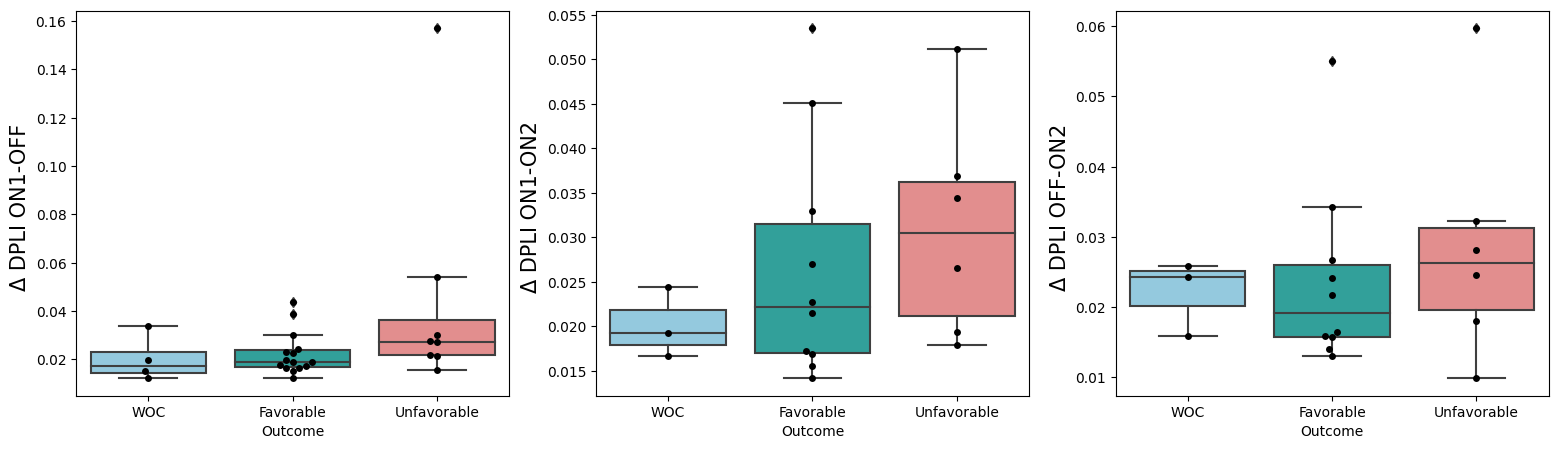

In [42]:
plt.figure(figsize = (19,5))

ax = plt.subplot(131)
# PLOT HEALTHY
ax = sns.boxplot(y = 'dpli_diff_on1_off', x = 'Outcome', data = data)
ax = sns.swarmplot(y = 'dpli_diff_on1_off', x = 'Outcome', data = data, color="black", size = 5)
ax.set_ylabel("\u0394 DPLI ON1-OFF ",fontsize=15)

ax = plt.subplot(132)
# PLOT HEALTHY
ax = sns.boxplot(y = 'dpli_diff_on1_on2', x = 'Outcome', data = data)
ax = sns.swarmplot(y = 'dpli_diff_on1_on2', x = 'Outcome', data = data, color="black", size = 5)
ax.set_ylabel("\u0394 DPLI ON1-ON2 ",fontsize=15)

ax = plt.subplot(133)
# PLOT HEALTHY
ax = sns.boxplot(y = 'dpli_diff_off_on2', x = 'Outcome', data = data)
ax = sns.swarmplot(y = 'dpli_diff_off_on2', x = 'Outcome', data = data, color="black", size = 5)
ax.set_ylabel("\u0394 DPLI OFF-ON2 ",fontsize=15)


Text(1235.2589869281046, 0.5, 'Δ hub OFF-ON2 ')

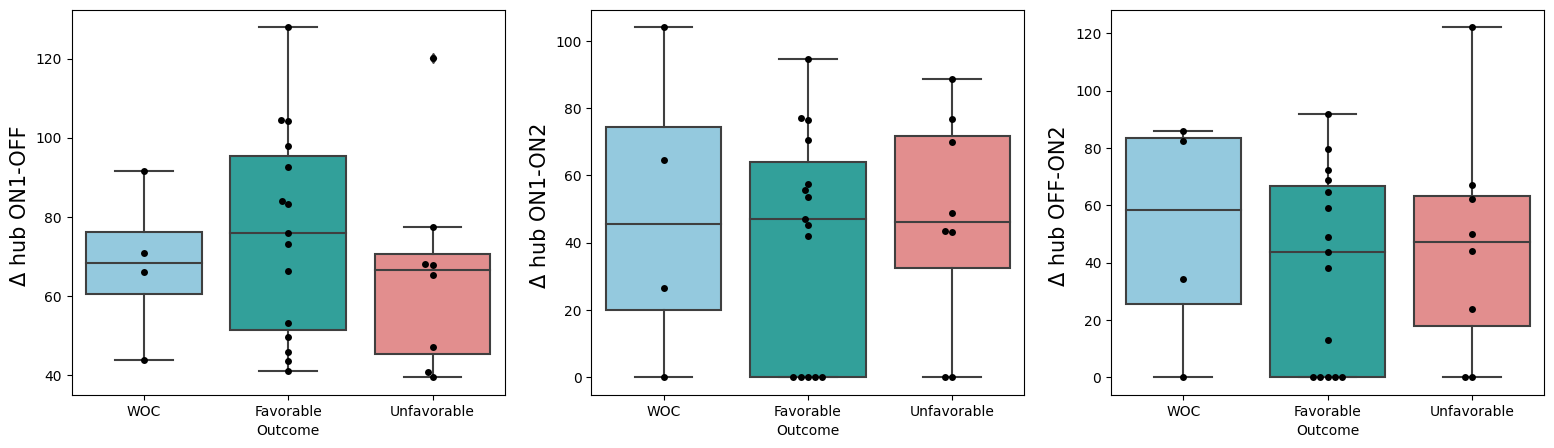

In [43]:
plt.figure(figsize = (19,5))

ax = plt.subplot(131)
# PLOT HEALTHY
ax = sns.boxplot(y = 'hub_diff_on1_off', x = 'Outcome', data = data)
ax = sns.swarmplot(y = 'hub_diff_on1_off', x = 'Outcome', data = data, color="black", size = 5)
ax.set_ylabel("\u0394 hub ON1-OFF ",fontsize=15)

ax = plt.subplot(132)
# PLOT HEALTHY
ax = sns.boxplot(y = 'hub_diff_on1_on2', x = 'Outcome', data = data)
ax = sns.swarmplot(y = 'hub_diff_on1_on2', x = 'Outcome', data = data, color="black", size = 5)
ax.set_ylabel("\u0394 hub ON1-ON2 ",fontsize=15)

ax = plt.subplot(133)
# PLOT HEALTHY
ax = sns.boxplot(y = 'hub_diff_off_on2', x = 'Outcome', data = data)
ax = sns.swarmplot(y = 'hub_diff_off_on2', x = 'Outcome', data = data, color="black", size = 5)
ax.set_ylabel("\u0394 hub OFF-ON2 ",fontsize=15)


Text(666.0176767676767, 0.5, 'dPLI Reconfiguration  ')

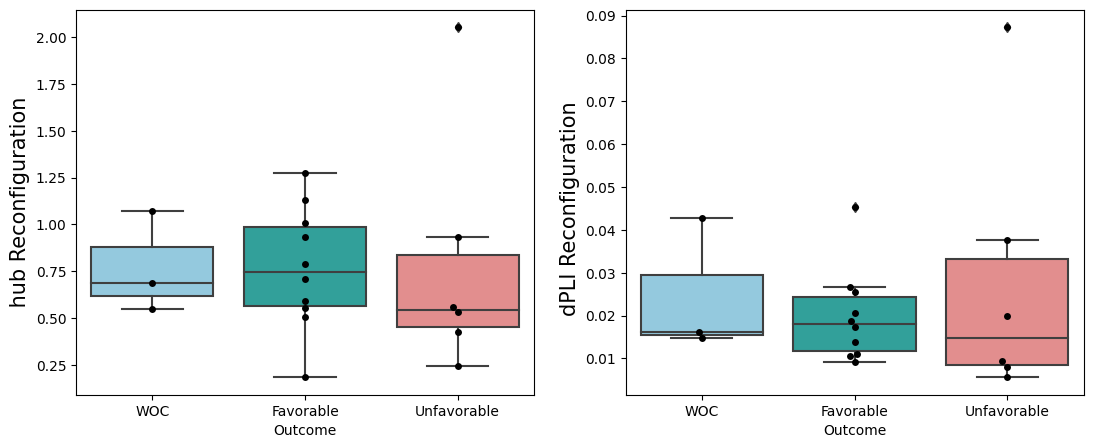

In [44]:
plt.figure(figsize = (13,5))

ax = plt.subplot(121)
# PLOT HEALTHY
ax = sns.boxplot(y = 'hub_ARI', x = 'Outcome', data = data)
ax = sns.swarmplot(y = 'hub_ARI', x = 'Outcome', data = data, color="black", size = 5)
ax.set_ylabel(" hub Reconfiguration ",fontsize=15)

ax = plt.subplot(122)
# PLOT HEALTHY
ax = sns.boxplot(y = 'dpli_ARI', x = 'Outcome', data = data)
ax = sns.swarmplot(y = 'dpli_ARI', x = 'Outcome', data = data, color="black", size = 5)
ax.set_ylabel("dPLI Reconfiguration  ",fontsize=15)


Text(0.5, 0, 'dPLI Reconfiguration')

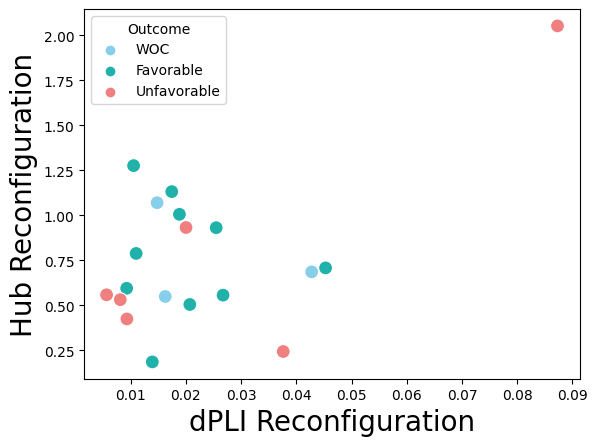

In [45]:
sns.scatterplot(y = 'hub_ARI', x = 'dpli_ARI', data = data, hue='Outcome', s = 100)

plt.ylabel('Hub Reconfiguration', fontsize = 20)
plt.xlabel('dPLI Reconfiguration', fontsize = 20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


PearsonRResult(statistic=0.013080465272472355, pvalue=0.9777958121349114)


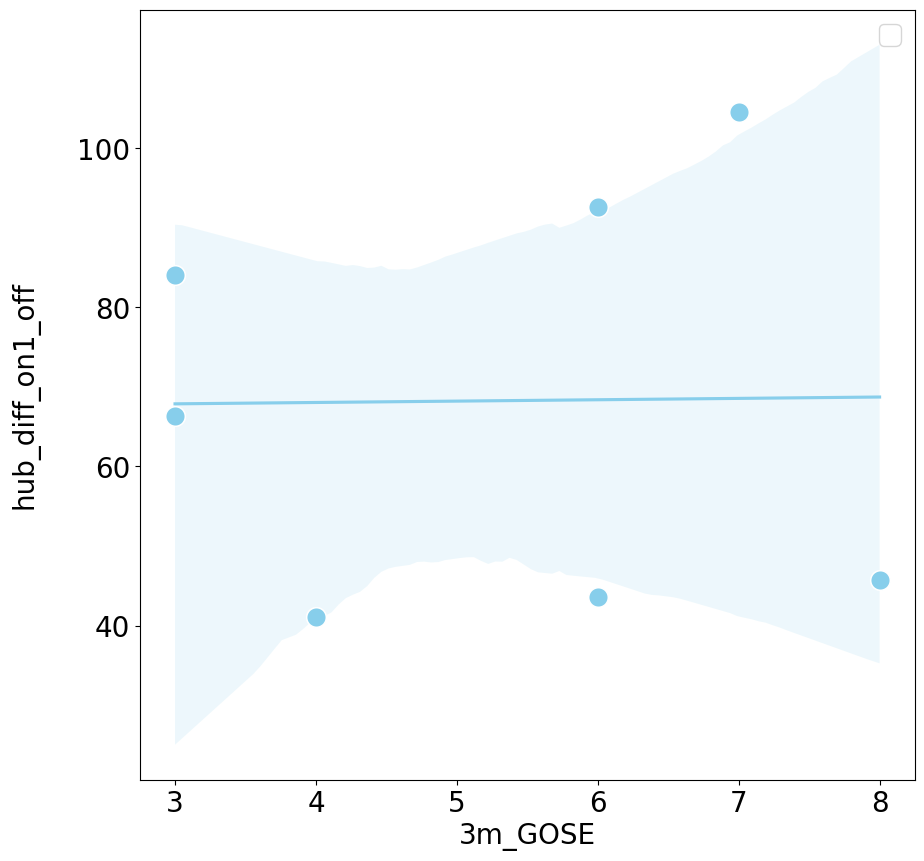

In [46]:
y = "hub_diff_on1_off"
x = "3m_GOSE"
data_r = data_favorable_3m

# plot CRSR or GCS scale correlation
plt.figure(figsize = (10,10))
ax = plt.subplot(111)

corr = pearsonr(data_r[x], data_r[y])
print(corr)
sns.regplot(x=x, y=y, data=data_r, color="skyblue")
sns.scatterplot(x=x, y=y,data=data_r, s = 200)
plt.legend(markerscale=1.5,prop={'size': 20})

ax.set_xlabel(x, fontsize=20)
ax.set_ylabel(y + '\n', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

PearsonRResult(statistic=-0.06511751425100577, pvalue=0.8106444913404897)


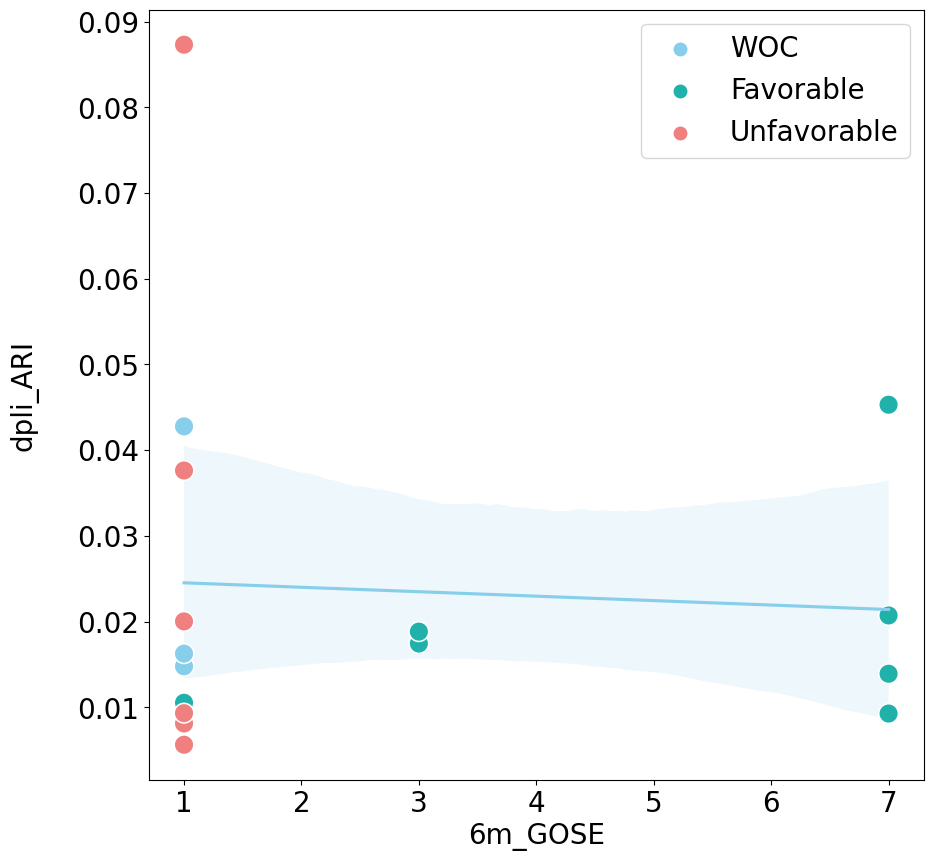

In [47]:
y = "dpli_ARI"
x = "6m_GOSE"
data_r = data_3_GOSE6m
hue = 'Outcome'
# plot CRSR or GCS scale correlation
plt.figure(figsize = (10,10))
ax = plt.subplot(111)

corr = pearsonr(data_r[x], data_r[y])
print(corr)
sns.regplot(x=x, y=y, data=data_r, color="skyblue")
sns.scatterplot(x=x, y=y,data=data_r, hue = hue, s = 200)
plt.legend(markerscale=1.5,prop={'size': 20})

ax.set_xlabel(x, fontsize=20)
ax.set_ylabel(y + '\n', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

KendalltauResult(correlation=-0.5520524474738834, pvalue=0.12597116307723114)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


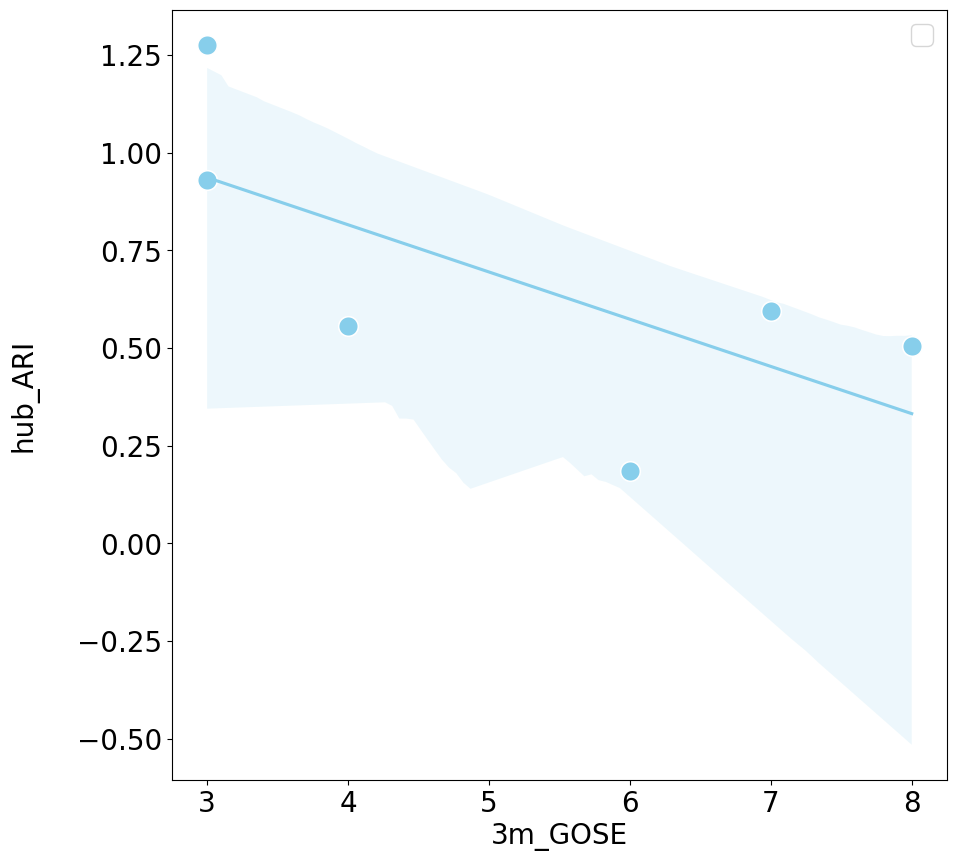

In [48]:
y = "hub_ARI"
x = "3m_GOSE"
data_r = data_3_favorable_3m

# plot CRSR or GCS scale correlation
plt.figure(figsize = (10,10))
ax = plt.subplot(111)

corr = kendalltau(data_r[x],data_r[y])
print(corr)

sns.regplot(x=x, y=y, data=data_r, color="skyblue")
sns.scatterplot(x=x, y=y,data=data_r, s = 200)
plt.legend(markerscale=1.5,prop={'size': 20})

ax.set_xlabel(x, fontsize=20)
ax.set_ylabel(y + '\n', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KendalltauResult(correlation=-0.5520524474738834, pvalue=0.12597116307723114)


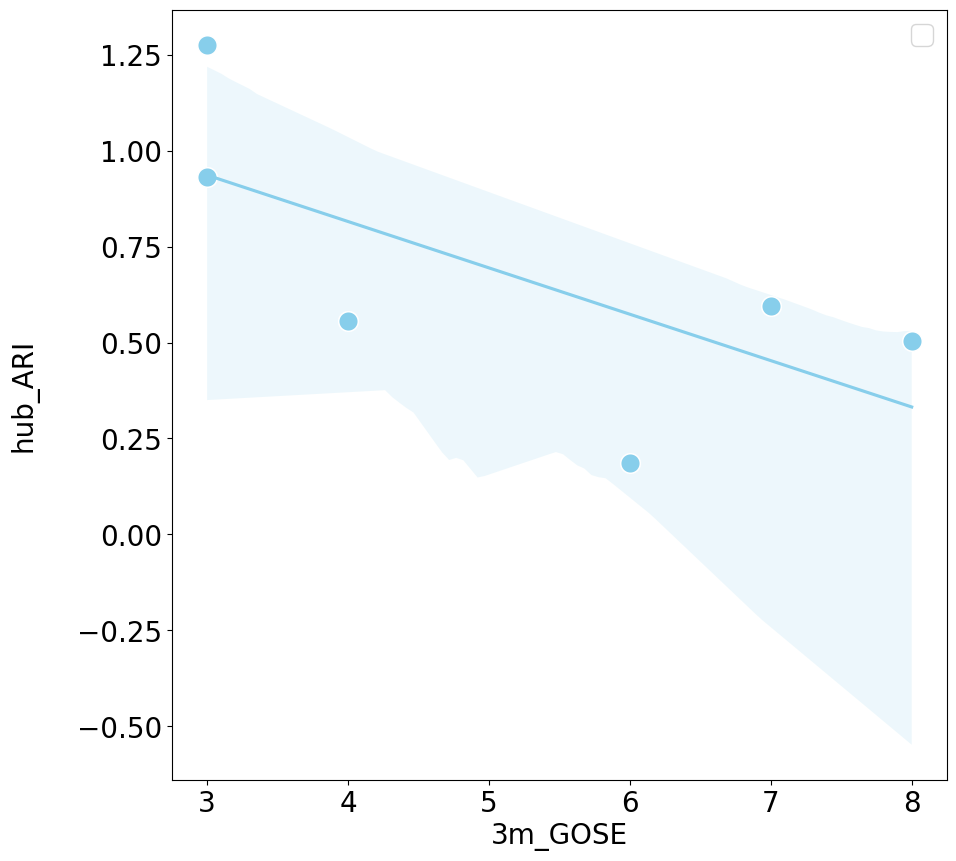

In [49]:
y = "hub_ARI"
x = "3m_GOSE"
data_r = data_3_favorable_3m

# plot CRSR or GCS scale correlation
plt.figure(figsize = (10,10))
ax = plt.subplot(111)

corr = kendalltau(data_r[x], data_r[y])
print(corr)
sns.regplot(x=x, y=y, data=data_r, color="skyblue")
sns.scatterplot(x=x, y=y,data=data_r, s = 200)
plt.legend(markerscale=1.5,prop={'size': 20})

ax.set_xlabel(x, fontsize=20)
ax.set_ylabel(y + '\n', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

KendalltauResult(correlation=0.6900655593423541, pvalue=0.05578260870684413)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


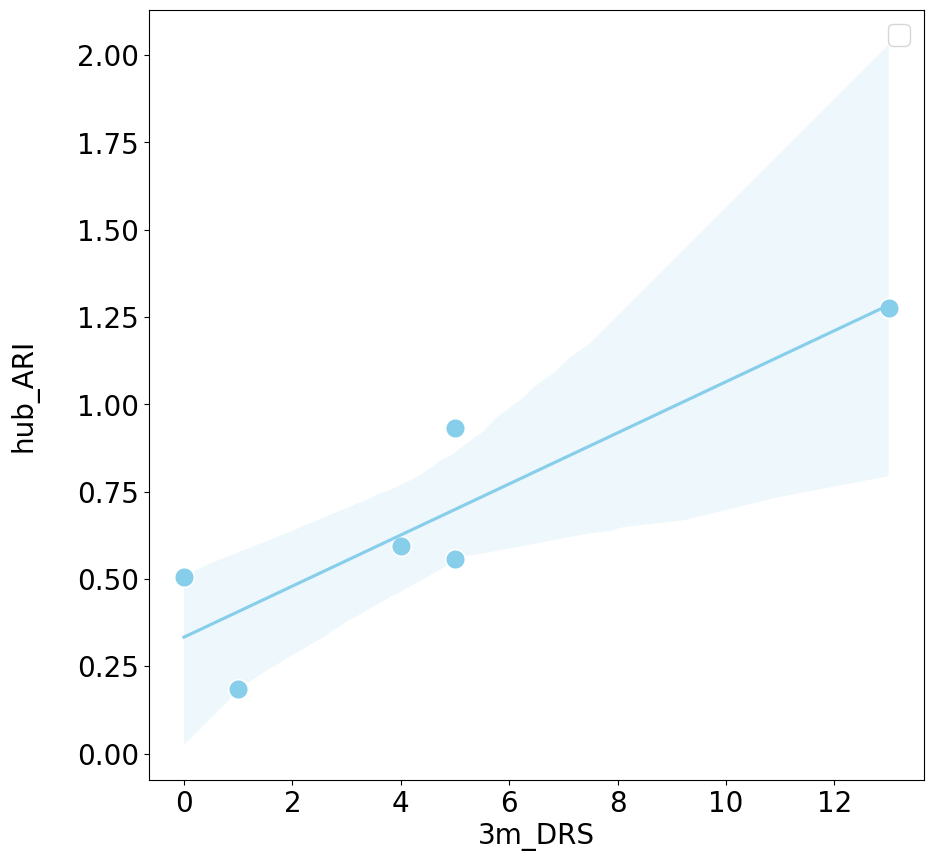

In [50]:
y = "hub_ARI"
x = "3m_DRS"
data_r = data_3_favorable_3m

# plot CRSR or GCS scale correlation
plt.figure(figsize = (10,10))
ax = plt.subplot(111)

corr = kendalltau(data_r[x], data_r[y])
print(corr)
sns.regplot(x=x, y=y, data=data_r, color="skyblue")
sns.scatterplot(x=x, y=y,data=data_r, s = 200)
plt.legend(markerscale=1.5,prop={'size': 20})

ax.set_xlabel(x, fontsize=20)
ax.set_ylabel(y + '\n', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

KendalltauResult(correlation=0.6900655593423541, pvalue=0.05578260870684413)


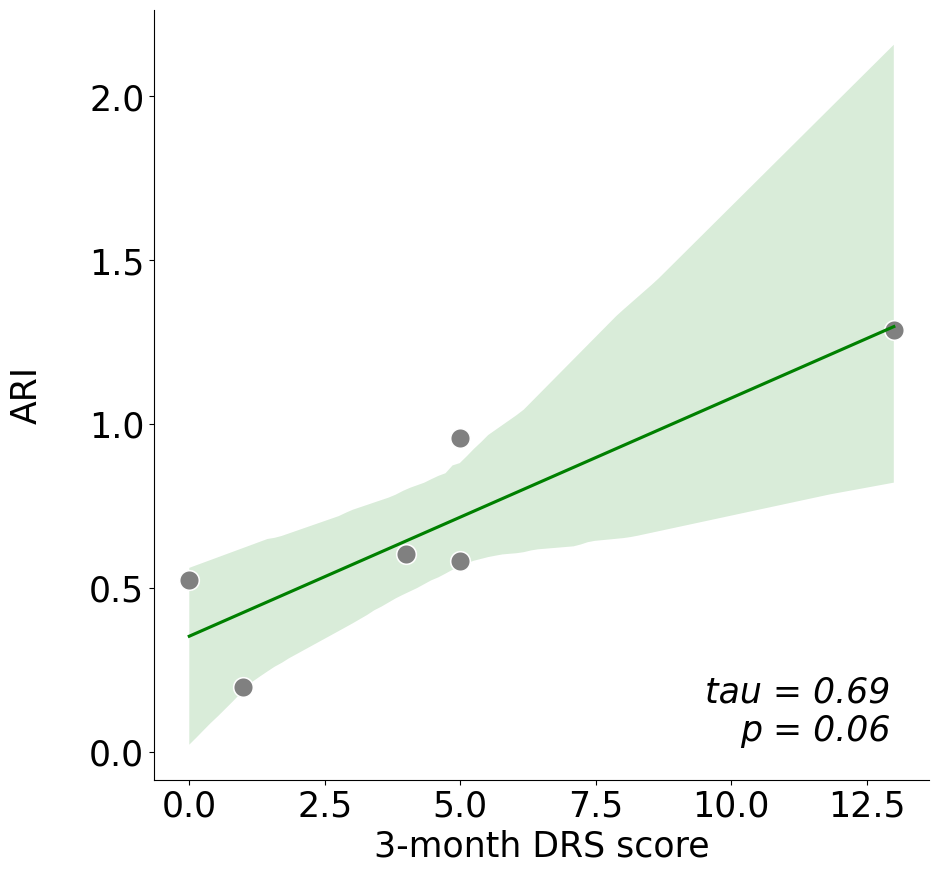

In [51]:
y = "ARI"
x = "3m_DRS"
data_r = data_3_favorable_3m

# plot CRSR or GCS scale correlation
plt.figure(figsize = (10,10))
ax = plt.subplot(111)

corr = kendalltau(data_r[x], data_r[y])
print(corr)
sns.regplot(x=x, y=y, data=data_r, color="green")
sns.scatterplot(x=x, y=y,data=data_r, s = 200, color = 'grey')

sig_corr = "tau = "+"%.2f" % corr[0]+ "\np = "+ "%.2f" % corr[1]
laby = ax.get_ylim()[0] + ((ax.get_ylim()[1]-ax.get_ylim()[0])/20)
labx = ax.get_xlim()[1] - ((ax.get_xlim()[1]-ax.get_xlim()[0])/20)
ax.text(labx, laby, sig_corr, fontsize = 25, fontstyle = 'italic', horizontalalignment = 'right')
    

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('3-month DRS score', fontsize=25)
ax.set_ylabel(y + '\n', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)

KendalltauResult(correlation=-0.5520524474738834, pvalue=0.12597116307723114)


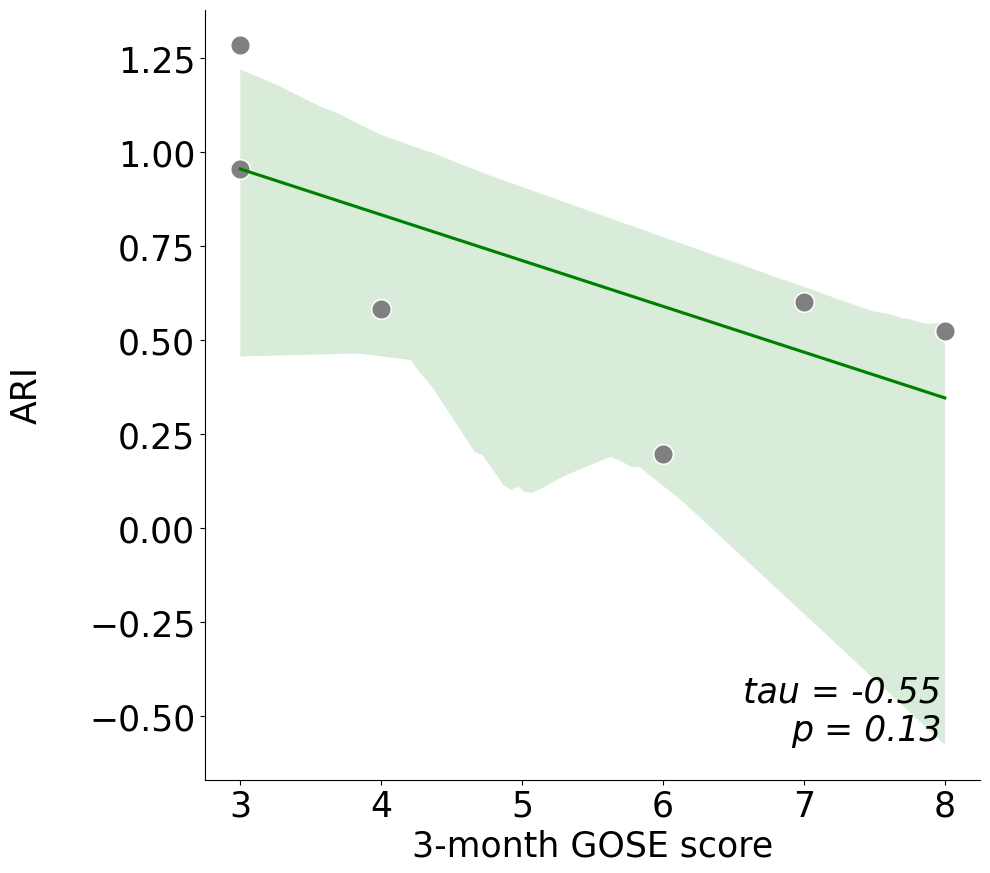

In [52]:
y = "ARI"
x = "3m_GOSE"
data_r = data_3_favorable_3m

# plot CRSR or GCS scale correlation
plt.figure(figsize = (10,10))
ax = plt.subplot(111)

corr = kendalltau(data_r[x], data_r[y])
print(corr)
sns.regplot(x=x, y=y, data=data_r, color="green")
sns.scatterplot(x=x, y=y,data=data_r, s = 200, color = 'grey')

sig_corr = "tau = "+"%.2f" % corr[0]+ "\np = "+ "%.2f" % corr[1]
laby = ax.get_ylim()[0] + ((ax.get_ylim()[1]-ax.get_ylim()[0])/20)
labx = ax.get_xlim()[1] - ((ax.get_xlim()[1]-ax.get_xlim()[0])/20)
ax.text(labx, laby, sig_corr, fontsize = 25, fontstyle = 'italic', horizontalalignment = 'right')
    

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('3-month GOSE score', fontsize=25)
ax.set_ylabel(y + '\n', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)

KendalltauResult(correlation=-0.7302967433402214, pvalue=0.06407750645105952)


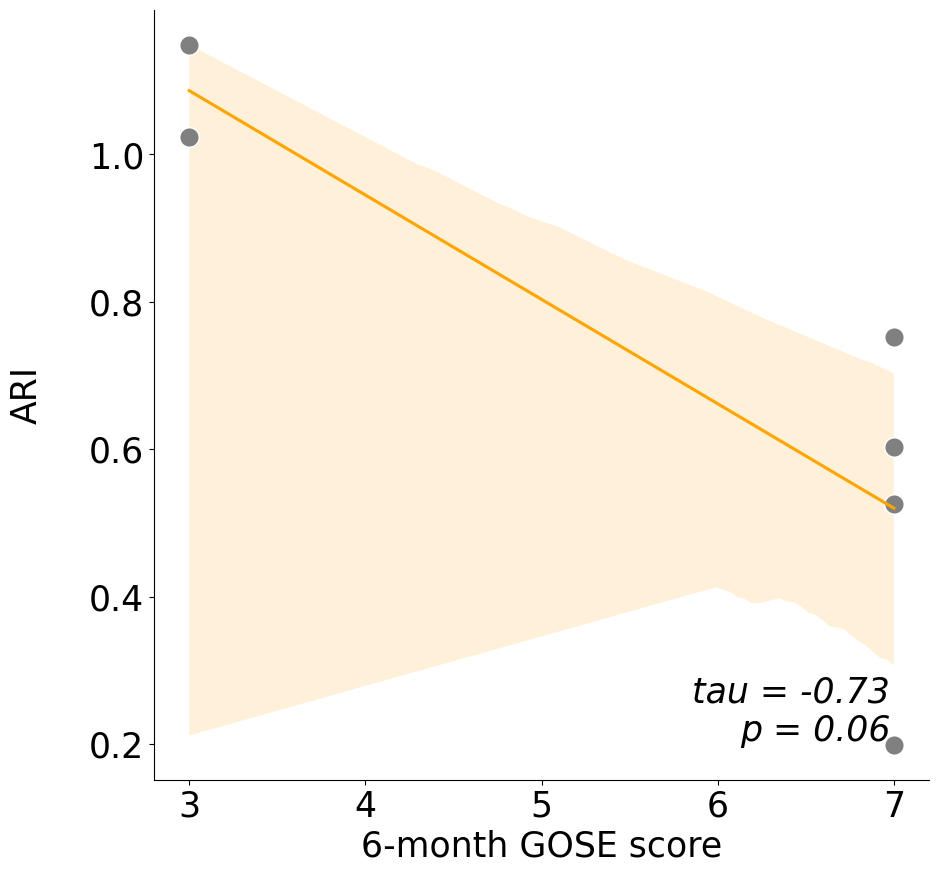

In [53]:
y = "ARI"
x = "6m_GOSE"
data_r = data_3_favorable_6m

# plot CRSR or GCS scale correlation
plt.figure(figsize = (10,10))
ax = plt.subplot(111)

corr = kendalltau(data_r[x], data_r[y])
print(corr)
sns.regplot(x=x, y=y, data=data_r, color="orange")
sns.scatterplot(x=x, y=y,data=data_r, s = 200, color = 'grey')

sig_corr = "tau = "+"%.2f" % corr[0]+ "\np = "+ "%.2f" % corr[1]
laby = ax.get_ylim()[0] + ((ax.get_ylim()[1]-ax.get_ylim()[0])/20)
labx = ax.get_xlim()[1] - ((ax.get_xlim()[1]-ax.get_xlim()[0])/20)
ax.text(labx, laby, sig_corr, fontsize = 25, fontstyle = 'italic', horizontalalignment = 'right')
    

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('6-month GOSE score', fontsize=25)
ax.set_ylabel(y + '\n', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)

KendalltauResult(correlation=0.6900655593423541, pvalue=0.05578260870684413)


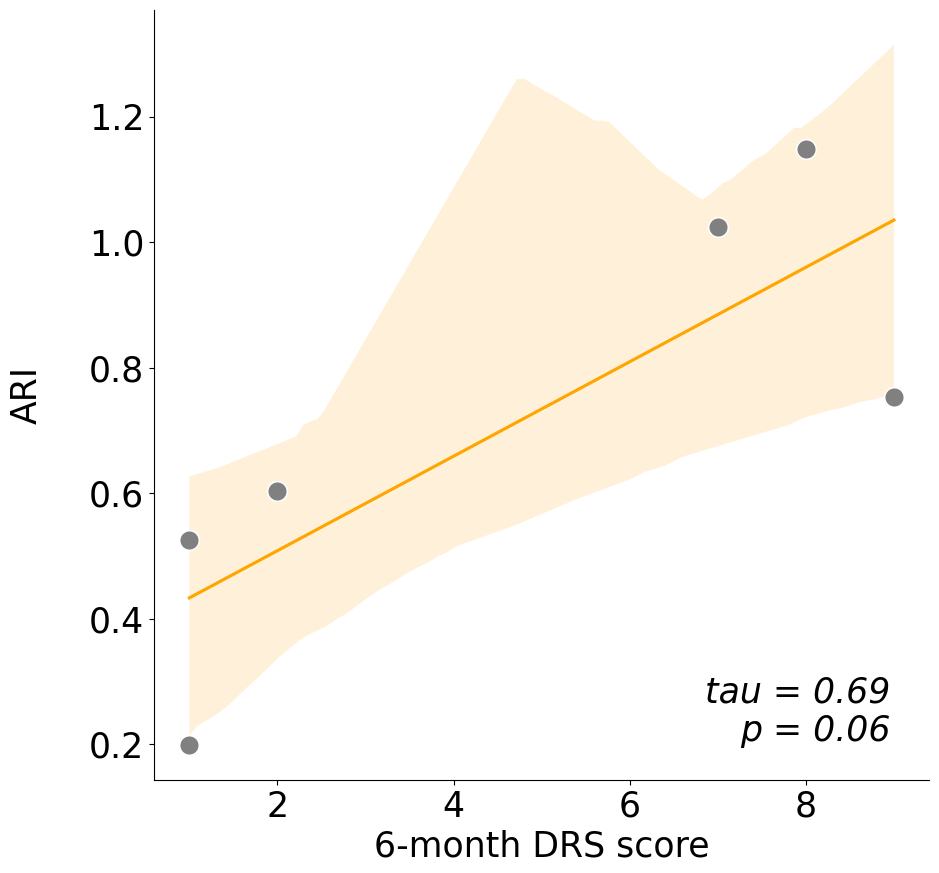

In [54]:
y = "ARI"
x = "6m_DRS"
data_r = data_3_favorable_6m

# plot CRSR or GCS scale correlation
plt.figure(figsize = (10,10))
ax = plt.subplot(111)

corr = kendalltau(data_r[x], data_r[y])
print(corr)
sns.regplot(x=x, y=y, data=data_r, color="orange")
sns.scatterplot(x=x, y=y,data=data_r, s = 200, color = 'grey')

sig_corr = "tau = "+"%.2f" % corr[0]+ "\np = "+ "%.2f" % corr[1]
laby = ax.get_ylim()[0] + ((ax.get_ylim()[1]-ax.get_ylim()[0])/20)
labx = ax.get_xlim()[1] - ((ax.get_xlim()[1]-ax.get_xlim()[0])/20)
ax.text(labx, laby, sig_corr, fontsize = 25, fontstyle = 'italic', horizontalalignment = 'right')
    

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('6-month DRS score', fontsize=25)
ax.set_ylabel(y + '\n', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)